In [113]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

import dill

In [114]:
dill.load_session("model.db")

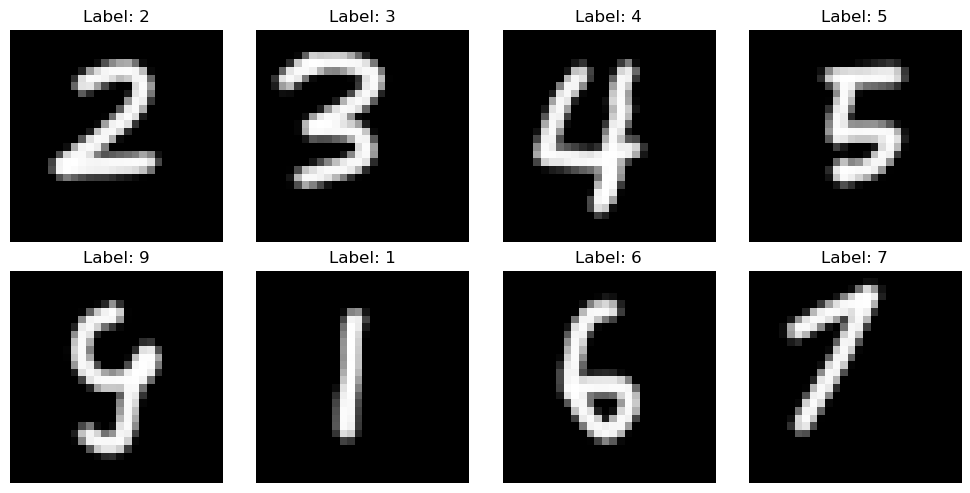

In [115]:
# Read the image
image = cv2.imread("b.png")

# gray scale conversion
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

divisions = np.array(list(np.hsplit(i, 4) for i in np.vsplit(image, 2)))

digits = []

for i in range(2):
    for j in range(4):
        digits.append(divisions[i][j])

digits = np.array(digits)
labels = [2, 3, 4, 5, 9, 1, 6, 7]

# show the image
fig, ax = plt.subplots(2, 4, figsize=(10, 5))
for i in range(2):
    for j in range(4):
        ax[i, j].imshow(digits[i * 4 + j], cmap="gray")
        ax[i, j].set_title(f"Label: {labels[i * 4 + j]}")
        ax[i, j].axis("off")

plt.tight_layout()
plt.show()

In [120]:
digits = digits.reshape(8, 1, 28, 28)

In [129]:
pred = model.predict(digits)

Predicting: 100%|██████████| 8/8 [00:00<00:00, 520.92it/s]


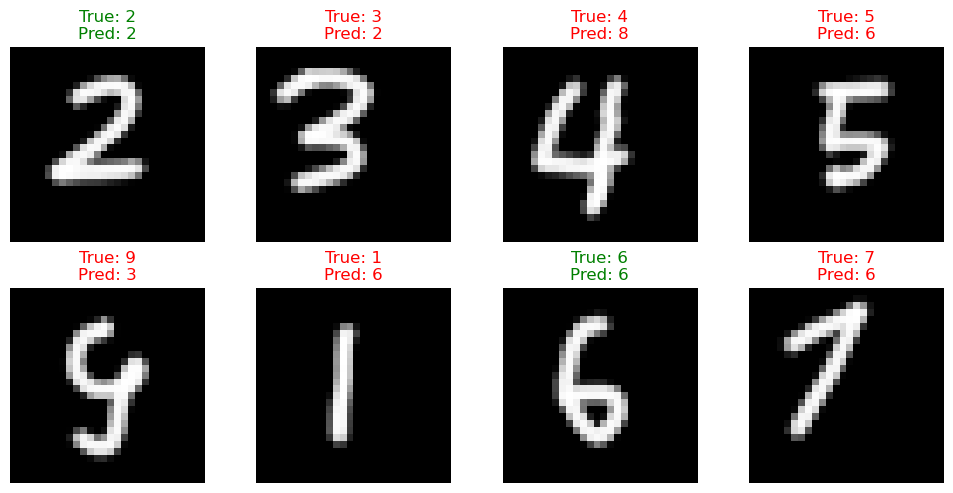

In [134]:
fig, ax = plt.subplots(2, 4, figsize=(10, 5))

for i in range(len(digits)):
    ax[i // 4, i % 4].imshow(digits[i].reshape(28, 28), cmap="gray")
    ax[i // 4, i % 4].set_title(
        f"True: {labels[i]}\nPred: {np.argmax(pred[i])}",
        color="green" if labels[i] == np.argmax(pred[i]) else "red",
    )
    ax[i // 4, i % 4].axis("off")


plt.tight_layout()
plt.show()